# Constraints

This section provides implementation for the concepts covered in the class for constrained sequential sampling, refer lecture notes for more details. Following methods are covered:

1. Constrained Exploitation
2. Constrained Exploration
3. Constrained Expected Improvement

To demonstrate the working of these methods, constrained version of **Modified Branin function**, which is written as

$$
    \begin{gathered}
        f(x_1, x_2) = \Bigg ( x_2 - \frac{5.1}{4\pi^2} x_1^2 + \frac{5}{\pi}x_1 - 6 \Bigg)^2 + 10 \Bigg( 1-\frac{1}{8\pi} \Bigg)\cos x_1 + 10 + 5x_1 \\
        g(x_1, x_2) = x_1x_2 \geq -3 \\
        -5 \leq x_1 \leq 10 \text{ and } 0 \leq x_2 \leq 15,
    \end{gathered}
$$

is used as a test function. The constrained minimum is $f(x^*) = 47.56$ at $x^* = (9.143, 3.281)$. For demonstration, gaussian process models will be used. Below block of code defines the function and constraint.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import FullFactorial

def modified_branin(x):

    dim = x.ndim

    if dim == 1:
        x = x.reshape(1, -1)

    x1 = x[:,0]
    x2 = x[:,1]

    b = 5.1 / (4*np.pi**2)
    c = 5 / np.pi
    t = 1 / (8*np.pi)

    y = (x2 - b*x1**2 + c*x1 - 6)**2 + 10*(1-t)*np.cos(x1) + 10 + 5*x1

    if dim == 1:
        y = y.reshape(-1)

    return y

def constraint(x):

    dim = x.ndim

    if dim == 1:
        x = x.reshape(1, -1)

    x1 = x[:,0]
    x2 = x[:,1]

    g = -x1*x2 + 30
    
    if dim == 1:
        g = g.reshape(-1)

    return g

Below code plots the function, constraint and global minimum.

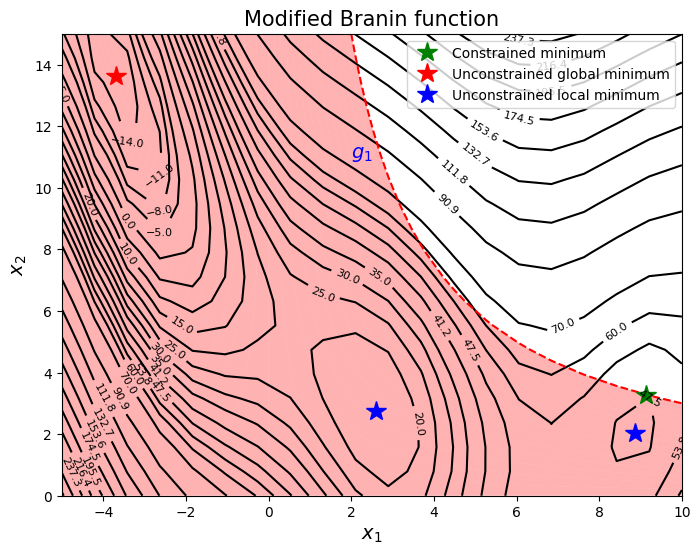

In [23]:
# Bounds
lb = np.array([-5, 10])
ub = np.array([0, 15])

# Plotting data
sampler = FullFactorial(xlimits=np.array([lb, ub]))
num_plot = 400
xplot = sampler(num_plot)
yplot = modified_branin(xplot)
gplot = constraint(xplot)

# Reshaping into grid
reshape_size = int(np.sqrt(num_plot))
X = xplot[:,0].reshape(reshape_size, reshape_size)
Y = xplot[:,1].reshape(reshape_size, reshape_size)
Z = yplot.reshape(reshape_size, reshape_size)
G = gplot.reshape(reshape_size, reshape_size)

# Level
levels = np.linspace(-17, -5, 5)
levels = np.concatenate((levels, np.linspace(0, 30, 7)))
levels = np.concatenate((levels, np.linspace(35, 60, 5)))
levels = np.concatenate((levels, np.linspace(70, 300, 12)))

fig, ax = plt.subplots(figsize=(8,6))

# Plot function
CS=ax.contour(X, Y, Z, levels=levels, colors='k', linestyles='solid')
ax.clabel(CS, inline=1, fontsize=8)

# Plot constraint
ax.contour(X, Y, G, levels=[0], colors='r', linestyles='dashed')
ax.contourf(X, Y, G, levels=np.linspace(0,G.max()), colors="red", alpha=0.3, antialiased = True)
ax.annotate('$g_1$', xy =(2.0, 11.0), fontsize=14, color='b')

# Plot minimum
ax.plot(9.143, 3.281, 'g*', markersize=15, label="Constrained minimum")
ax.plot(-3.689, 13.630, 'r*', markersize=15, label="Unconstrained global minimum")
ax.plot(2.594, 2.741, 'b*', markersize=15, label="Unconstrained local minimum")
ax.plot(8.877, 2.052,'b*', markersize=15)

# Asthetics
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title("Modified Branin function", fontsize=15)
ax.legend()

The goal is to find minimum of the function while satisfying constraint using sequential sampling.